# Analyze Amazon Product Reviews

# Dataset used: Mobile Phone

 Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset

url = "mobile.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82815 entries, 0 to 82814
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          82815 non-null  object 
 1   name          82810 non-null  object 
 2   rating        82815 non-null  int64  
 3   date          82815 non-null  object 
 4   verified      82815 non-null  bool   
 5   title         82805 non-null  object 
 6   body          82795 non-null  object 
 7   helpfulVotes  33134 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.5+ MB


In [7]:
df.describe()

,rating,helpfulVotes
count,82815.000000,33134.000000
mean,3.760357,7.204835
std,1.605644,28.057901
min,1.000000,1.000000
25%,2.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,4.000000
max,5.000000,932.000000


In [8]:
# deleting unnecessary columns

In [9]:
df.drop(['asin','name','date','verified','helpfulVotes'],axis=1,inplace=True)

In [10]:
df.head(10)

,rating,title,body
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...
5,4,Worked great for me,"Hello, I have this phone and used it until I d..."
6,5,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...
7,4,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that..."
8,5,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this..."
9,3,Pissed off-a little bit,ok well im in school and i need the text messa...


In [11]:
df.drop(['body'],axis=1,inplace=True)

In [12]:
#rename columns

In [13]:
df.rename(columns={'title':'Reviews','rating':'Ratings'},inplace=True)

In [14]:
df.head()

,Ratings,Reviews
0,3,"Def not best, but not worst"
1,1,Text Messaging Doesn't Work
2,5,Love This Phone
3,3,"Love the Phone, BUT...!"
4,4,"Great phone service and options, lousy case!"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82815 entries, 0 to 82814
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  82815 non-null  int64 
 1   Reviews  82805 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [16]:
#checking for null values

In [17]:
df.isnull().sum()

Ratings     0
Reviews    10
dtype: int64

In [18]:
# delete rows with null values

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [21]:
df.shape

(82805, 2)

In [22]:
#lets see distribution of ratings

In [23]:
df['Ratings'].value_counts()

5    45003
1    16428
4    10710
3     5757
2     4907
Name: Ratings, dtype: int64

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
ratings_percentage = 100* df['Ratings'].value_counts()/len(df)
ratings_percentage

5    54.348167
1    19.839382
4    12.934002
3     6.952479
2     5.925971
Name: Ratings, dtype: float64

<AxesSubplot:>

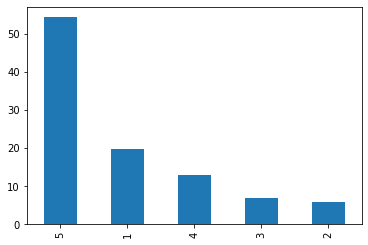

In [26]:
ratings_percentage.plot.bar()

In [27]:
df.head()

,Ratings,Reviews
0,3,"Def not best, but not worst"
1,1,Text Messaging Doesn't Work
2,5,Love This Phone
3,3,"Love the Phone, BUT...!"
4,4,"Great phone service and options, lousy case!"


## Data Cleaning

In [28]:
#applying data cleaning techniques

In [29]:
#converting all of the words into a consistent case format,say lowercase

In [30]:
df['Reviews'] = df['Reviews'].str.lower()

In [31]:
df.head()

,Ratings,Reviews
0,3,"def not best, but not worst"
1,1,text messaging doesn't work
2,5,love this phone
3,3,"love the phone, but...!"
4,4,"great phone service and options, lousy case!"


In [32]:
#Remove Punctuations

In [33]:
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]',"")

In [34]:
df.Reviews.head(20)

0                     def not best but not worst
1                     text messaging doesnt work
2                                love this phone
3                             love the phone but
4     great phone service and options lousy case
5                            worked great for me
6              wanna cool nokia you have it here
7           problem with 3588i universal headset
8                                     cool phone
9                         pissed offa little bit
10                 works great but dont dropt it
11         slow annoying fragile heavy and bulky
12          worth paying more for something else
13         great free phone for sprint customers
14                                  stupid phone
15                              exellent service
16                                     i love it
17                                 phones locked
18                             excellent product
19                                       warning
Name: Reviews, dtype

In [35]:
#Tokenization

In [36]:
import nltk
from nltk import word_tokenize

In [37]:
token_lists=[word_tokenize(each)for each in df['Reviews']]
tokens= [item for sublist in token_lists for item in sublist]
print("number of unique tokens :",len(set(tokens)))

number of unique tokens : 11601


In [38]:
token_lists

[['def', 'not', 'best', 'but', 'not', 'worst'],
 ['text', 'messaging', 'doesnt', 'work'],
 ['love', 'this', 'phone'],
 ['love', 'the', 'phone', 'but'],
 ['great', 'phone', 'service', 'and', 'options', 'lousy', 'case'],
 ['worked', 'great', 'for', 'me'],
 ['wan', 'na', 'cool', 'nokia', 'you', 'have', 'it', 'here'],
 ['problem', 'with', '3588i', 'universal', 'headset'],
 ['cool', 'phone'],
 ['pissed', 'offa', 'little', 'bit'],
 ['works', 'great', 'but', 'dont', 'dropt', 'it'],
 ['slow', 'annoying', 'fragile', 'heavy', 'and', 'bulky'],
 ['worth', 'paying', 'more', 'for', 'something', 'else'],
 ['great', 'free', 'phone', 'for', 'sprint', 'customers'],
 ['stupid', 'phone'],
 ['exellent', 'service'],
 ['i', 'love', 'it'],
 ['phones', 'locked'],
 ['excellent', 'product'],
 ['warning'],
 ['nextel', 'boost', 'phone'],
 ['nice', 'but'],
 ['it',
  'seems',
  'it',
  'doesnt',
  'work',
  'with',
  'the',
  'existing',
  'att',
  'sim',
  'card'],
 ['five', 'stars'],
 ['supply', 'are', 'needed'],


In [39]:
#Remove Stopwords
from nltk.corpus import stopwords
set(stopwords.words('english'))
#set of stopwords
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(Reviews):
    return " ".join([word for word in str(Reviews).split() if word not in stop_words])
df["Reviews"] = df["Reviews"].apply(lambda Reviews: cleaning_stopwords(Reviews))

In [40]:
df.Reviews.head()

0                            def best worst
1                text messaging doesnt work
2                                love phone
3                                love phone
4    great phone service options lousy case
Name: Reviews, dtype: object

In [41]:
# Text Normalization

In [42]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [43]:
#Spelling Correction

In [44]:
#from textblob import TextBlob
#df["Reviews"] = df["Reviews"].apply(lambda x: str(TextBlob(x).correct()))

In [45]:
#Lemmatization

In [46]:
from textblob import Word
df["Reviews"] = df["Reviews"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [47]:
df.Reviews.head()

0                           def best worst
1               text messaging doesnt work
2                               love phone
3                               love phone
4    great phone service option lousy case
Name: Reviews, dtype: object

In [48]:
df.head()

,Ratings,Reviews
0,3,def best worst
1,1,text messaging doesnt work
2,5,love phone
3,3,love phone
4,4,great phone service option lousy case


In [49]:
rating_1 = df[df['Ratings'] == 1]
rating_2 = df[df['Ratings'] == 2]
rating_3 = df[df['Ratings'] == 3]
rating_4 = df[df['Ratings'] == 4]
rating_5 = df[df['Ratings'] == 5]

In [50]:
df_sample = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis=0)
df_sample.reset_index(drop=True,inplace=True)

In [51]:
#pip install wordcloud

In [52]:
# create wordclouds of Reviews

In [53]:
from wordcloud import WordCloud

In [54]:
# Concatenating all Reviews into a  single string
df_str = df_sample.Reviews.str.cat()

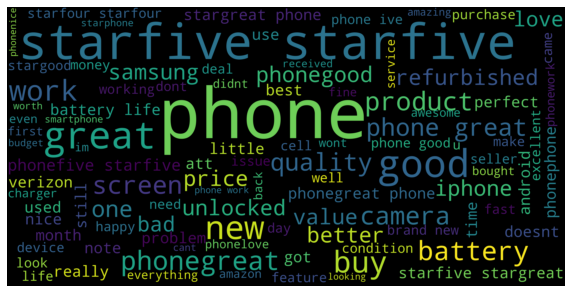

In [55]:
wordcloud = WordCloud(max_font_size=100,# maximum font size fir the largest word
                     max_words = 100, #maximum number of words
                     background_color = "black",
                     scale=10,#scaling between computation and drawing
                     width=800,#width of the canvas
                     height=400,#height of the canvas
                     ).generate(df_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")#to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [56]:
#splitting data into positive(Ratings is 4 or 5) and negative(Ratings is 1 or 2)
neg= df_sample[df_sample['Ratings'].isin([1,2])]
pos= df_sample[df_sample['Ratings'].isin([4,5])]
#And concatenate to single string
neg_str=neg.Reviews.str.cat()
pos_str=pos.Reviews.str.cat()

Text(0.5, 1.0, 'Reviews with Positive Scores')

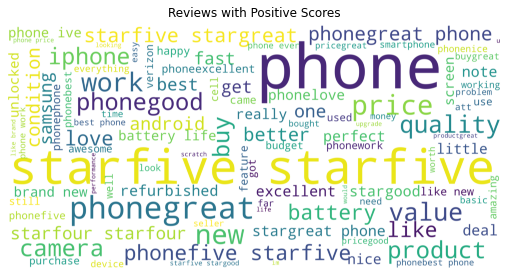

In [57]:
# Create positive word Cloud

# remove 'good' and 'great' from positive words as it is included in Negative Reviews such as 'not good'
set(stopwords.words('english'))
#set of stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["good","great"])
# good and great is removed because it is used in negative reviews

wordcloud_pos=WordCloud(background_color='white',max_font_size=100,# maximum font size fir the largest word
                     max_words = 100, #maximum number of words
                     scale=10, #scaling between computation and drawing
                     width=800, #width of the canvas
                     height=400,
                       stopwords=stop_words).generate(pos_str) # height of the canvas
#plotting of positive word clouds
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(212)
ax1.imshow(wordcloud_pos,interpolation='bilinear')
plt.axis("off")
ax1.set_title('Reviews with Positive Scores')

Text(0.5, 1.0, 'Reviews with Negative Scores')

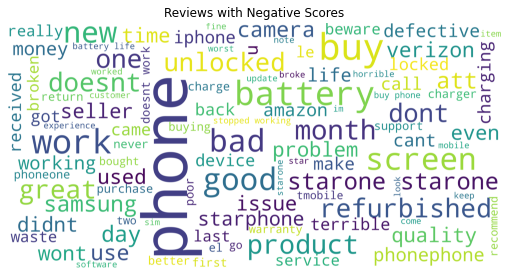

In [58]:
# create negative word clouds
wordcloud_neg=WordCloud(background_color='white',max_font_size=100,# maximum font size fir the largest word
                     max_words = 100, #maximum number of words
                     scale=10, #scaling between computation and drawing
                     width=800, #width of the canvas
                     height=400).generate(neg_str) # height of the canvas
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.imshow(wordcloud_neg,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores')

## Sentiment Score

In [59]:
#to show reviews with ratings > 3 as positive sentiments and reviews with ratings<3 as negative sentiments
df['Sentiment'] = df['Ratings'].apply(lambda Ratings: 1 if Ratings>3 else 0)
#Removing Neutral REviews
df= df[df.Ratings!=3]
#Printing the counts
df['Sentiment'].value_counts()

1    55713
0    21335
Name: Sentiment, dtype: int64

In [60]:
# data is highly imbalanced

### So,we need to do Under Sampling so that our Model can make better predictions.

#### 0- Negative Reviews

#### 1- Positive Reviews

In [61]:
# Separating the Data for further Analysis

negatives = df[df.Sentiment == 0]

positives = df[df.Sentiment == 1]

In [62]:
negatives.shape

(21335, 3)

In [63]:
positives.shape

(55713, 3)

# Under-Sampling: Built a sample dataset from original dataset

no of negative reviews = 21335

#### So what to do:

lets take take 25000 values randomly from Positive Reviews.

after this will have a dataset with

-25000-positive Reviews

and

-21335-Negative Reviews

In [64]:
pos_sample= positives.sample(n=25000)

In [65]:
# Concatenate two Dtaframes(pos_sample and negatives)

In [66]:
df_new = pd.concat([pos_sample,negatives],axis=0)

In [67]:
df_new.head()

,Ratings,Reviews,Sentiment
41130,5,love,1
11425,5,verizon phone,1
77782,4,excellent good price,1
70047,4,dual sim muy bien,1
69378,5,good service,1


<AxesSubplot:>

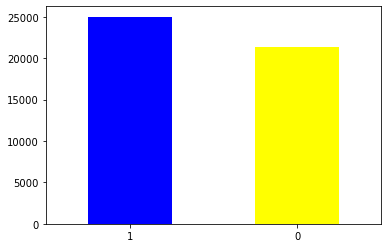

In [68]:
result = df_new['Sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['blue','yellow'])

In [69]:
df_new.shape

(46335, 3)

In [70]:
df_new.head()

,Ratings,Reviews,Sentiment
41130,5,love,1
11425,5,verizon phone,1
77782,4,excellent good price,1
70047,4,dual sim muy bien,1
69378,5,good service,1


# Train-Test Splitting

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train_set,test_set = train_test_split(df_new,test_size=0.3,random_state=42)

In [73]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:32434
 Rows in test set:13901



In [74]:
train_set['Sentiment'].value_counts()

1    17413
0    15021
Name: Sentiment, dtype: int64

In [75]:
test_set['Sentiment'].value_counts()

1    7587
0    6314
Name: Sentiment, dtype: int64

In [76]:
df_new = train_set.copy()

### Splitting Features and Labels

In [77]:
df_new = train_set.drop("Sentiment",axis=1)
df_labels = train_set["Sentiment"].copy()

In [78]:
df_new.head()

,Ratings,Reviews
47995,1,pantalla rota
21561,5,five star
37707,4,work properly
46212,1,horrible cheap crap
56162,1,advertised 64gb recieved 32gb


In [79]:
df_labels.head()

47995    0
21561    1
37707    1
46212    0
56162    0
Name: Sentiment, dtype: int64

In [80]:
# convert text documents to numerical vectors

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_new.Reviews).toarray()

In [82]:
X.shape

(32434, 5000)

# Selecting a desired model

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1, solver = "lbfgs")         # Accuracy Score is 89%
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()                                             # Accuracy Score is 71%
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(max_depth=2, random_state=42)       # Accuracy Score is 53%

In [84]:
# training the logistic regression with trained dataset

In [85]:
model.fit(X,df_labels)

LogisticRegression(tol=0.1)

In [86]:
df_prediction = model.predict(X)

In [87]:
#Accuracy scores
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(df_labels,df_prediction)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.888357896035025


In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df_labels,df_prediction))

[[13397  1624]
 [ 1997 15416]]


In [89]:
from sklearn.metrics import precision_score , recall_score

In [90]:
#This is my precision score
precision_score(df_labels, df_prediction)

0.9046948356807512

In [91]:
#This is my recall score
recall_score(df_labels, df_prediction)

0.8853155688278872

In [92]:
#F1 Score--------it is harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
f1_score(df_labels, df_prediction)

0.8949002989580008

In [93]:
# check Classification Report
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     15021
           1       0.90      0.89      0.89     17413

    accuracy                           0.89     32434
   macro avg       0.89      0.89      0.89     32434
weighted avg       0.89      0.89      0.89     32434



## Testing the model on test dataset

In [94]:
X_test = test_set.drop("Sentiment",axis=1)
Y_test = test_set["Sentiment"].copy()

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X1 = vectorizer.fit_transform(X_test.Reviews).toarray()

In [96]:
X1.shape

(13901, 4233)

In [97]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(tol = 0.1, solver = 'lbfgs')   # Accuracy Score is 90%
#from sklearn.naive_bayes import GaussianNB
#model1 = GaussianNB()                                      # Accuracy Score is 78%
#from sklearn.ensemble import RandomForestClassifier
#model1 = RandomForestClassifier(max_depth=2, random_state=0) # Accuracy Score is 54%
model1.fit(X1,Y_test)

LogisticRegression(tol=0.1)

In [98]:
X_test_prediction = model1.predict(X1)

In [99]:
from sklearn.metrics import accuracy_score
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.9023091863894683


In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,X_test_prediction))

[[5708  606]
 [ 752 6835]]


In [101]:
from sklearn.metrics import precision_score , recall_score
precision_score(Y_test , X_test_prediction)

0.9185593334229271

In [102]:
recall_score(Y_test , X_test_prediction)

0.9008830894951891

In [103]:
#F1 Score--------it is harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
f1_score(Y_test , X_test_prediction)

0.9096353473516104

In [104]:
# check Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6314
           1       0.92      0.90      0.91      7587

    accuracy                           0.90     13901
   macro avg       0.90      0.90      0.90     13901
weighted avg       0.90      0.90      0.90     13901



### Difference between actual and predicted values

In [105]:
pd.DataFrame(np.c_[df_labels,df_prediction],columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
32429,1,1
32430,0,0
32431,0,0
32432,1,1


### Saving the Model

In [106]:
import pickle
pickle.dump(vectorizer, open("TfidfVectorizer.pkl", "wb"))
pickle.dump(model1, open("Amazon_Product_review.pkl", "wb"))

### Load my model and tfidfVectorizer

In [107]:
save_vectorizer = pickle.load(open('TfidfVectorizer.pkl', 'rb'))
model1 = pickle.load(open('Amazon_Product_Review.pkl', 'rb'))

In [108]:
# Define a function to test model

In [109]:
def test_model(sentence):
    sen = save_vectorizer.transform([sentence]).toarray()
    
    res = model1.predict(sen)
    if res == 0:
        return 'Negative Review'
    else:
        return 'Positive Review'
    


In [110]:
# Test postive review and check prediction of our model

In [111]:
sen = 'excellent quality starfive'
res = test_model(sen)
print(res)

Positive Review


In [112]:
# Test Negative review and check predition of our model

In [113]:
sen = ' great product'
res = test_model(sen)
print(res)


Positive Review
